<a href="https://colab.research.google.com/github/aned0227/property_workorder_automation_pipeline/blob/main/01_generate_inspection_folders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter target work order and login info

In [ ]:
#targetTech = 'Denver Constructs'
#this was used to swap between company profiles

In [ ]:
username = 'cdsinc4u'
password = 'password$'

In [ ]:
!pip install -Uqq ipdb
import ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00


In [ ]:
!pip install lxml
!pip install beautifulsoup4
!pip install requests
!pip install webdriver-manager
!apt-get update
#!apt-get install chromium chromium-driver
#!pip install selenium

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [66.7 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,606 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,311 kB]
Hit:13 https://ppa.launc

In [ ]:
!pip install selenium==4.11.2 #4.9.0
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
--2024-03-08 06:07:58--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 172.253.115.91, 172.253.115.136, 172.253.115.93, ...
Connecting to dl.google.com (dl.google.com)|172.253.115.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106071384 (101M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 101.16M   307MB/s    in 0.3s    

2024-03-08 06:07:59 (307 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [106071384/106071384]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead o

In [ ]:
!google-chrome --version

Google Chrome 122.0.6261.111 


In [ ]:
!wget https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip

--2024-03-08 06:08:23--  https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 172.253.63.207, ...
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7407250 (7.1M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   7.06M  --.-KB/s    in 0.03s   

2024-03-08 06:08:23 (220 MB/s) - ‘chromedriver_linux64.zip’ saved [7407250/7407250]

Archive:  chromedriver_linux64.zip
  inflating: chromedriver            
  inflating: LICENSE.chromedriver    


In [ ]:
!google-chrome --version

Google Chrome 122.0.6261.111 


below code is used to hide yourself from domain, not appearing as a bot

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service


chrome_options = webdriver.ChromeOptions()
#run Selenium in headless mode
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
#overcome limited resource problems
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("lang=en")
#open Browser in maximized mode
chrome_options.add_argument("start-maximized")
chrome_options.add_argument("--window-size=1920,1200")

#disable infobars
chrome_options.add_argument("disable-infobars")
#disable extension
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--disable-blink-features=AutomationControlled")

#service = Service(executable_path=r'chromedriver')

browser = webdriver.Chrome(service=Service(), options=chrome_options)

In [ ]:
import os
import shutil
from google.colab import files
import re
import zipfile
import time
import sys # to access the system
import cv2
from google.colab.patches import cv2_imshow
from bs4 import BeautifulSoup

Pathlight signin Page

In [ ]:
browser.get("https://scopesey.pathlightmgt.com/")
time.sleep(15)
#browser.save_screenshot("screenshot_scopesey.png")
browser.title

'Pathlight'

In [ ]:
from selenium.webdriver.common.by import By

# login to website
def login_prog():
  time.sleep(5)
  input_user = browser.find_element(By.ID, "username")
  input_password = browser.find_element(By.ID, "password")

  input_user.send_keys(username)
  input_password.send_keys(password)
  login_button = browser.find_element(By.XPATH, '//*[@id="kc-login"]')
  login_button.click()

In [ ]:
if (browser.title == 'Pathlight'):
  login_prog()

In [ ]:
# login button location and selections

# used to verify logged in state of webpage
# (added time.sleep(5) for webpage to fully load up)
#time.sleep(2)
browser.save_screenshot("inProgress.png")
browser.title

'Pathlight'

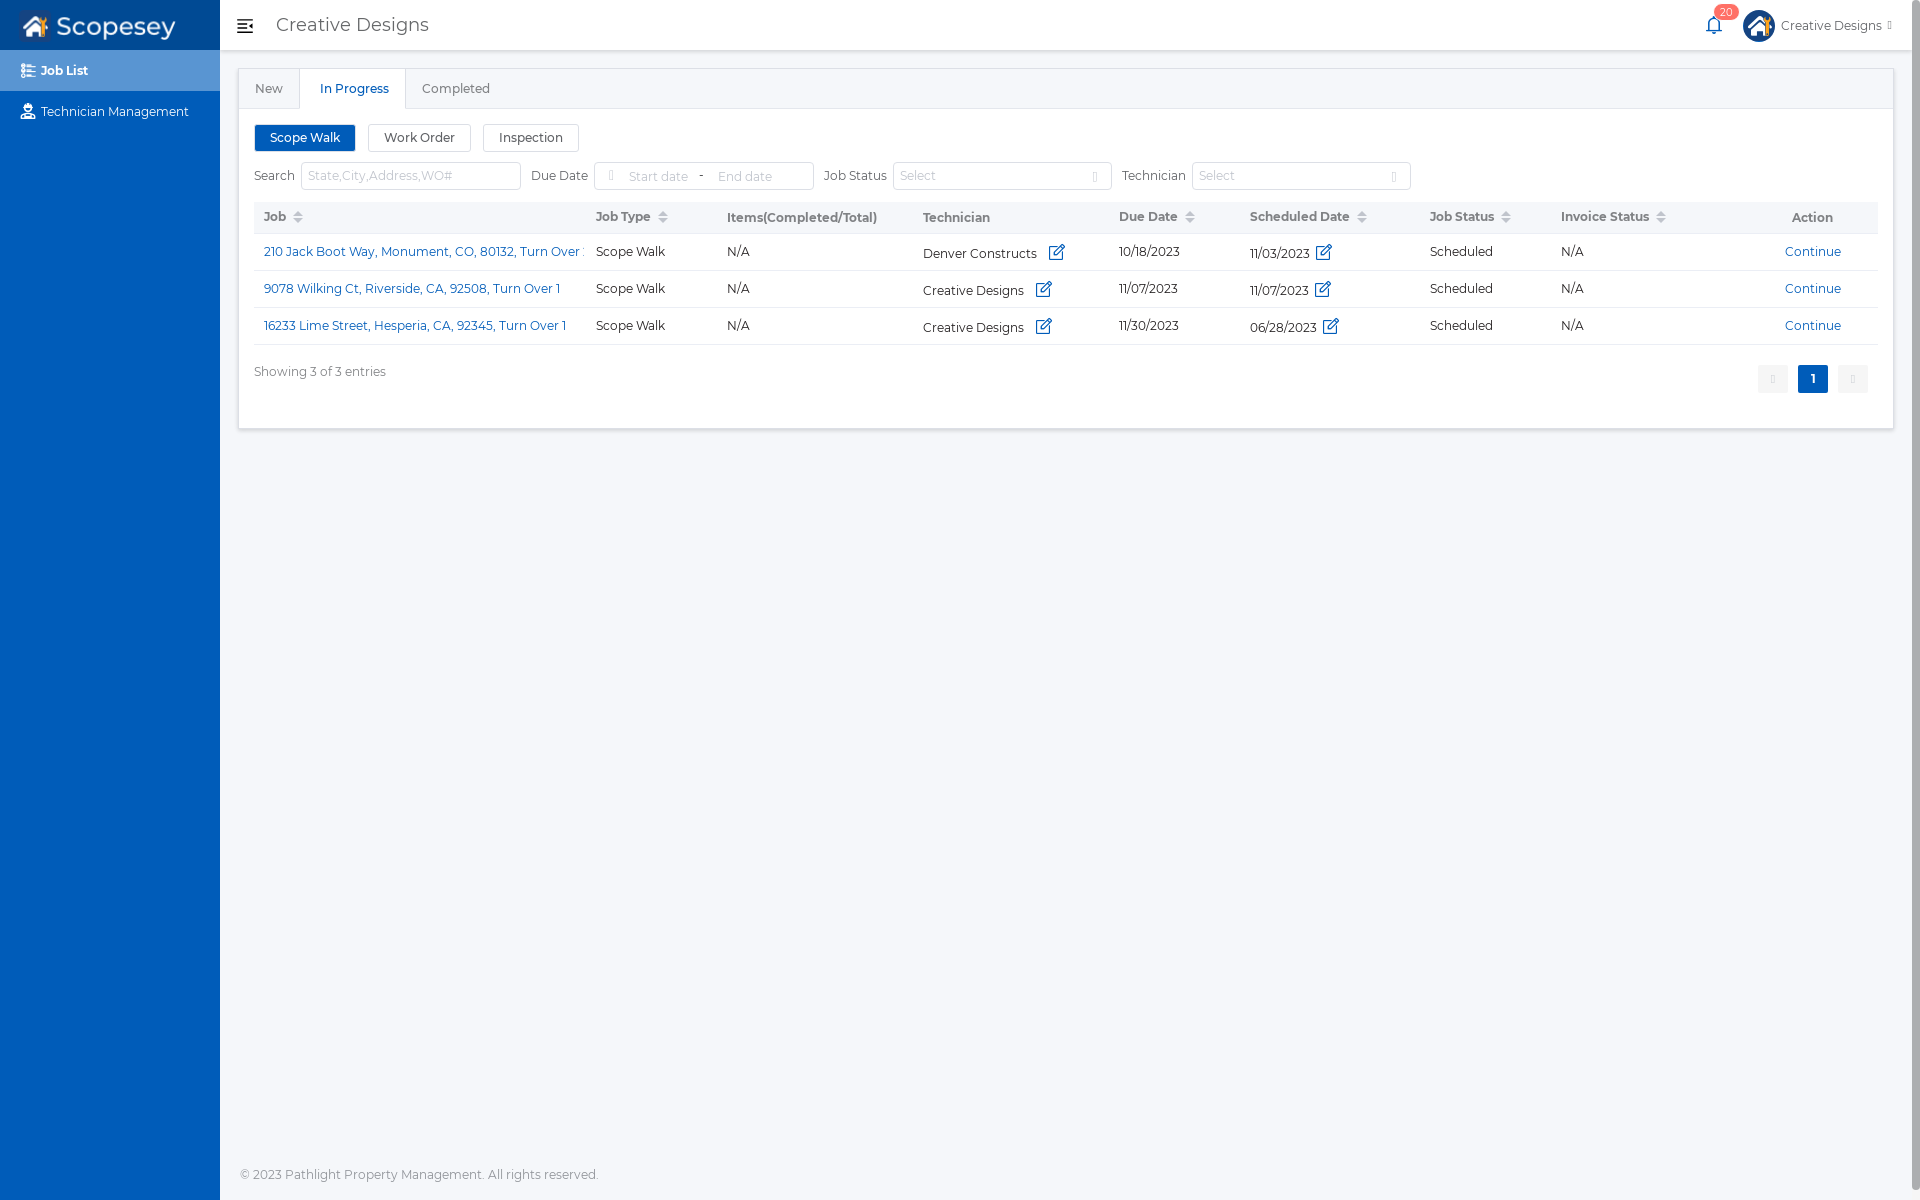

In [ ]:
#display in progress page in full view ,starting with scopewalk

browser.get("https://scopesey.pathlightmgt.com/joblist?tab=1")
time.sleep(7)
browser.save_screenshot("inProgress.png")

img = cv2.imread("inProgress.png", cv2.IMREAD_ANYCOLOR)

while True:
    cv2_imshow(img)
    cv2.waitKey(5)
    break # to exit from all the processes

cv2.destroyAllWindows() # destroy all windows

In [ ]:


#display in progress page in full view ,starting with scopewalk


In [ ]:
#display in progress page Work Orders

#next button available to be pressed?
WO_Btn = browser.find_element(By.XPATH, '//*[@id="app"]/div[1]/div[2]/section/div/div[1]/div[2]/div[3]/div[2]/div[1]/div[3]/table/tbody/tr[1]/td[1]/div/a')
if WO_Btn.is_enabled():
  WO_Btn.click()
  img = cv2.imread("inProgress.png", cv2.IMREAD_ANYCOLOR)

  while True:
    cv2_imshow(img)
    cv2.waitKey(5)
    break # to exit from all the processes

  cv2.destroyAllWindows() # destroy all windows

NoSuchElementException: ignored

In [ ]:
#downloading from shared link https://drive.google.com/file/d/1PfWxY_ISo6Q-P9OGVADXflWhMUoy7-nM/view

!gdown --id 1PfWxY_ISo6Q-P9OGVADXflWhMUoy7-nM -O my_file.zip

In [ ]:
#with zipfile.ZipFile('my_file.zip', 'r') as zip_ref:
 #   zip_ref.extractall('files')
  #  time.sleep(5)

In [ ]:
soup = BeautifulSoup(browser.page_source)

In [ ]:
first_number_int = int(3)
second_number_int = int(3)
#code used to determine how many scopewalks are pending



time.sleep(5)
#jobsAmount = browser.find_element(By.XPATH,'//*[@id="app"]/div[1]/div[2]/section/div/div[2]/div/div[3]/span')
jobsAmount = browser.find_element(By.XPATH,'//*[@id="app"]/div[1]/div[2]/section/div/div[1]/div[2]/div[3]/div[3]/span')
text = jobsAmount.text
words = text.split()  # split the string into a list of words
first_number = words[1]
second_number = words[3]
first_number_int = int(first_number)
first_number_int = int(3)
second_number_int = int(second_number)
print(f'displaying {first_number_int} of {second_number_int} entries')

In [ ]:
first_number_int = int(3)
second_number_int = int(3)

In [ ]:
i = 0
scopeUrl = []
workAvail = False;
choice = ''
while(i < first_number_int):

  #getting jobtype text address

  #jobAddy = f'//*[@id="app"]/div[1]/div[2]/section/div/div[2]/div/div[2]/div/div[1]/div[3]/table/tbody/tr[{i+1}]/td[2]/div/span'
  jobAddy = f'//*[@id="app"]/div[1]/div[2]/section/div/div[1]/div[2]/div[3]/div[2]/div[1]/div[3]/table/tbody/tr[1]/td[1]/div/a'


  modJobAddy = f'''{jobAddy}'''
  jobType = browser.find_element(By.XPATH,modJobAddy)

  #getting technician text address
  techAddy = f'//*[@id="app"]/div[1]/div[2]/section/div/div[2]/div/div[2]/div/div[1]/div[3]/table/tbody/tr[{i+1}]/td[4]/div/span'
  modTechAddy = f'''{techAddy}'''
  technician = browser.find_element(By.XPATH,modTechAddy)

  #getting technician text address
  itemsAddy = f'//*[@id="app"]/div[1]/div[2]/section/div/div[2]/div/div[2]/div/div[1]/div[3]/table/tbody/tr[{i+1}]/td[3]/div/span'
  moditemsAddy = f'''{itemsAddy}'''
  items = browser.find_element(By.XPATH,moditemsAddy)

  if(jobType.text == 'Scope Walk' and technician.text == targetTech and items.text == 'N/A'):
    workAvail = True;
    urlAddy = f'//*[@id="app"]/div[1]/div[2]/section/div/div[2]/div/div[2]/div/div[1]/div[3]/table/tbody/tr[{i+1}]/td[1]/div/a'
    modurlAddy = f'''{urlAddy}'''
    urls = browser.find_element(By.XPATH,modurlAddy)
    scopeUrl.append(urls.get_attribute('href'))

  i = i+1

In [ ]:
scopeUrl = ['https://scopesey.pathlightmgt.com/joblist/scopewalk/35548']

creating scopewalk sections for zip folder in selected language

In [ ]:
def languageCheck(choice):

  if (choice != '1'):
    scopelist = {
    'Inspection' : 'general condition photos and walk (Utilities, and hvac filter photos)',
    'Paint interior' :  'paint walls edge to edge',
    'Bathrooms-plumbing' : 'shower heads, faucets, toilets, sinks',
    'Bathrooms-accessories' : 'towel bars, paper holders, medicine cabinets, vents, counters',
    'Cabinets' : 'paint bottoms, adjustments, repairs, replacements',
    'Camera' : 'we have to install a 4 dummy cameras on exterior of property',
    'Drywall' : 'holes, uneven surfaces, previous work that was done that needs remedy',
    'Trim' : 'baseboard, crown molding, chair rail (they ask for linear feet of repairs)',
    'Flooring' : 'carpet, vinyl, plank [squarefootage]',
    'Electrical' : 'lighting, wiring, fans, gfci, outlets, cover plates, bulbs (gfci should be present in kitchen and wet areas, they want uniformity so match the color for replacements, whether it be white or beige, cover plates, outlets, etc).',
    'Exterior' : 'would cover stucco, sidings, cracks in exterior wall, paint, driveway cracks, etc',
    'Safety' : 'smoke alarms, co detectors, fire extinguishers, batteries: 9v and AA, detectors or alarms over 10 years old: replace, no anti tip device in oven? install one, no fire extinguisher present under kitchen sink? install, alarms not 10yrs old but need batteries?install',
    'Fireplace' : 'service, repairs, chimney sweep',
    'Caulking' : 'seal all wet areas',
    'Windows' : 'repairs, screens, replacements',
    'Blinds' : 'all areas [MakeReadys: all windows, TurnOvers:only windows facing street]',
    'Laundry room' : 'vents, caps, repairs',
    'Appliances' : 'cooktop,range,oven, microwave, dishwasher, refrigerator, vent hood, Always measure the space for refrigerator(W-H) and memo it on appliance photo in google drive, Dimensions of appliances (especially the max width refrigerator the opening can accommodate), Gas or Electric range / cooktop, Vented or recirculating over the range microwave',
    'Kitchen': 'sink, faucet, disposal, counter',
    'Doors' : 'interior/exterior, closets, knobs, door stops',
    'Roof': 'repairs, boots, tiles and material, gutters',
    'Landscaping' : 'mow/blow, weeds, trees, shrubs, mulch, rock',
    'Fencing' : 'gates, pickets, repairs and adjustments',
    'Irrigation': 'sprinklers',
    'Pool' : 'filters, cleaning, pump, light, stucco',
    'Cleaning' : 'maid all areas',
    'Trash': 'measured in cubic yards',
    'HVAC' : 'all parts and services, vents, filters, condensor,controller',
    'Exterior' : 'stucco, siding, cracks, paint',
    'Hot Water Heater' : 'always adjust temp and show in photo that it is in proper range',
    'Garage':  'Door/ Opener- all parts'
    }

  else:
    scopelist = {
    'Inspección' : 'fotos de la condición general y recorrido (Utilidades, y fotos de filtros de HVAC)',
    'Pintura interior' : 'pintar las paredes de borde a borde',
    'Baños-plomería' : 'cabezales de ducha, grifos, inodoros, lavabos',
    'Baños-accesorios' : 'barras de toallas, soportes para papel, gabinetes de medicina, ventilaciones, mostradores',
    'Gabinetes' : 'pintar fondos, ajustes, reparaciones, reemplazos',
    'Cámara' : 'tenemos que instalar 4 cámaras ficticias en el exterior de la propiedad',
    'Pared de yeso' : 'agujeros, superficies desiguales, trabajos anteriores que necesitan remedio',
    'Adorno' : 'rodapié, moldura de corona, riel de silla (solicitan pies lineales para reparaciones)',
    'Pisos' : 'alfombra, vinilo, tablón [metros cuadrados]',
    'Eléctrico' : 'iluminación, cableado, ventiladores, GFCI, enchufes, placas de cubierta, bombillas (GFCI deben estar presentes en la cocina y áreas húmedas, quieren uniformidad así que haga coincidir el color para los reemplazos, ya sea blanco o beige, placas de cubierta, enchufes, etc).',
    'Exterior' : 'cubre estuco, revestimientos, grietas en la pared exterior, pintura, grietas en el camino de entrada, etc',
    'Seguridad' : 'alarmas de humo, detectores de CO, extintores de incendios, baterías: 9v y AA, detectores o alarmas mayores de 10 años: reemplace, no hay dispositivo anti-inclinación en el horno? instale uno, no hay extintor de incendios presente debajo del fregadero de la cocina? instale, alarmas no de 10 años pero necesitan baterías? instale',
    'Chimenea' : 'servicio, reparaciones, barrido de chimenea',
    'Sellado' : 'sellar todas las áreas húmedas',
    'Ventanas' : 'reparaciones, pantallas, reemplazos',
    'Persianas' : 'todas las áreas [MakeReadys: todas las ventanas, TurnOvers: solo ventanas con vista a la calle]',
    'Lavadero' : 'ventilaciones, tapas, reparaciones',
    'Electrodomésticos' : 'placa de cocina, rango, horno, microondas, lavavajillas, refrigerador, campana extractora, Siempre mida el espacio para el refrigerador (ancho,  alto y profundidad) y anótelos en la foto del electrodoméstico en Google Drive, Dimensiones de los electrodomésticos (especialmente la anchura máxima que la apertura puede acomodar para el refrigerador), Rango de gas o eléctrico / placa de cocina, Microondas de recirculación o ventilado sobre el rango',
    'Cocina': 'fregadero, grifo, triturador, mostrador',
    'Puertas' : 'interior/exterior, armarios, pomos, topes de puertas',
    'Techo': 'reparaciones, botas, tejas y material, canalones',
    'Paisajismo' : 'corte/soplado, malas hierbas, árboles, arbustos, mantillo, roca',
    'Vallado/Cerca' : 'puertas, listones, reparaciones y ajustes',
    'Irrigación': 'aspersores',
    'Piscina' : 'filtros, limpieza, bomba, luz, estuco',
    'Limpieza' : 'servicio de limpieza en todas las áreas',
    'Basura': 'medido en yardas cúbicas',
    'Aire acondicionado' : 'todas las partes y servicios, ventilaciones, filtros, condensador, controlador',
    'Exterior' : 'estuco, revestimiento, grietas, pintura',
    'Calentador de agua caliente' : 'siempre ajuste la temperatura y muestre en la foto que está en el rango adecuado',
    'Garaje':  'Puerta/ Abrelatas- todas las partes'
    }
  return scopelist

distinguishing between property types- make_ready:prev owned by private party, turn_over: prev leased by tenant

In [ ]:

def mainFolderName(scropeUrl):
  mainFolder = []

  for u in scopeUrl:
    browser.get(u)
    time.sleep(5)
    location = browser.find_element(By.XPATH,'//*[@id="app"]/div[1]/div[2]/section/div[2]/div[1]/div/div/div[1]/span[1]')
    addy = location.text
    # replace 'Turn Over' or 'Turn Over <anything>' with 'TO'
    addy = re.sub(r'Turn Over.*$', '_TO', addy, flags=re.IGNORECASE)
    # replace 'Make Ready' or 'Make Ready <anything>' with 'MR'
    addy = re.sub(r'Make Ready.*$', '_MR', addy, flags=re.IGNORECASE)

    lockbox = browser.find_element(By.XPATH,'//*[@id="app"]/div[1]/div[2]/section/div[2]/div[1]/div/div/div[2]/div/div[1]/div[2]')
    dueDate = browser.find_element(By.XPATH,'//*[@id="app"]/div[1]/div[2]/section/div[2]/div[1]/div/div/div[2]/div/div[3]/div[2]')
    dueDate = str(dueDate.text)
    dueDate = dueDate.replace('/', '-')
    mainFolder.append(f'{addy},lockbox_{lockbox.text},due_{dueDate},assigned_')
    print(u)
    print(mainFolder)
  return mainFolder

Create zip folders from list of properties containing standard scopewalk sections

In [ ]:

def create_and_zip_folders(mainFolder, scopeList,choice):
    # Create the primary folder
    if not os.path.exists(mainFolder):
        os.makedirs(mainFolder)

    with zipfile.ZipFile('my_file.zip', 'r') as zip_ref:
        zip_ref.extractall('files')

    base_path = '/content/files/baseForScopewalk'

    if not os.path.exists(mainFolder):
        os.makedirs(mainFolder)
    if(choice != '1'):
      os.makedirs(os.path.join(mainFolder, '0. Rekey', 'before'))
      os.makedirs(os.path.join(mainFolder, '0. Rekey', 'after'))
    else:
      os.makedirs(os.path.join(mainFolder, '0. Rekey', 'antes'))
      os.makedirs(os.path.join(mainFolder, '0. Rekey', 'despues'))
    os.makedirs(os.path.join(mainFolder, '2. Scopewalk'))

    # Move the files
    for file_name in os.listdir(base_path):
        if (file_name == 'Rekey.html'):
            shutil.move(os.path.join(base_path, file_name), os.path.join(mainFolder, '0. Rekey'))
        elif file_name not in ['Rekey.html', 'camera.jpg', 'Chimney.jpg', 'exterior.jpg', 'roofing.png', 'SprinklerSystem.jpg']:
            shutil.move(os.path.join(base_path, file_name), mainFolder)

    # In '2. Scopewalk' folder, create folders for each key in the dictionary
    scopewalk_folder = os.path.join(mainFolder, '2. Scopewalk')
    for key, value in scopeList.items():
        key_folder = os.path.join(scopewalk_folder, key)
        if not os.path.exists(key_folder):
            os.makedirs(key_folder)

        # Write the value to a text file in its respective folder
        if(choice != '1'):
          file_path = os.path.join(key_folder, 'description.txt')
        elif(choice == '1'):
          file_path = os.path.join(key_folder, 'descripción.txt')
        with open(file_path, 'w') as f:
            f.write(f'{key} - {value}')

         # copy the specific images into the specific sub-folders
        if(choice != '1'):
          image_dict = {"Camera": "camera.jpg","Fireplace": "Chimney.jpg", "Exterior": "exterior.jpg", "Roof": "roofing.png", "Irrigation": "SprinklerSystem.jpg"}
        elif(choice == '1'):
          image_dict = {"Cámara": "camera.jpg","Chimenea": "Chimney.jpg", "Exterior": "exterior.jpg", "Techo": "roofing.png", "Irrigación": "SprinklerSystem.jpg"}
        if key in image_dict:
            shutil.copy(f'/content/files/baseForScopewalk/{image_dict[key]}', key_folder)


    # Zip the main folder
    shutil.make_archive(mainFolder, 'zip', mainFolder)
    #files.download(f'/content/{mainFolder}.zip')

spanish coversion portion

In [ ]:
def foundWork():
  c = input("work found:\nWould you like to convert the list to Spanish (1) or leave it in English (2)? Please enter '1' or '2': ")
  scope = languageCheck(c)

  main = mainFolderName(scopeUrl)

  for m in main:
    create_and_zip_folders(m, scope,c)
    files.download(f'/content/{m}.zip')

In [ ]:
#if workAvail == True:
  #foundWork()
foundWork()